# 一、找到持仓增多的

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from dataModel import JJs, Stocks, db

old_date = "2023-02-14"
new_date = "2023-03-18"

db.close()
print("开始连接数据库...")
db.connect()
sSelect = Stocks.select()
print("开始查找上次数据...")
olds = sSelect.where((Stocks.date == old_date))
aups = []
bups = []
downs = []
yesterday = int(new_date.split("-")[-1]) - 1
yesterday = "-".join(new_date.split("-")[:-1]) + f"-{yesterday}"
for old in olds:
    name = old.name
    new = sSelect.where(
        (Stocks.date == new_date or Stocks.date == yesterday),
        (Stocks.name == name),
        (Stocks.n >= 10),
    )
    if new:
        new = new[0]
        data = {
            "股票名称": new.name,
            f"【{old_date}】持有基金个数": old.n,
            f"【{new_date}】持有基金个数": new.n,
            f"【{old_date}】基金持有市值": old.money,
            f"【{new_date}】基金持有市值": new.money,
        }
        if new.n > old.n:
            aups.append(data)
        elif round(new.money, 3) > round(old.money, 3):
            bups.append(data)
        else:
            downs.append(data)


def asort(stock):
    """获取排序的key，持有基金个数按数量绝对值差排序"""
    return stock[f"【{new_date}】持有基金个数"] - stock[f"【{old_date}】持有基金个数"]


def bsort(stock):
    """获取排序的key，基金持仓市值按比例排序"""
    return stock[f"【{new_date}】基金持有市值"] - stock[f"【{old_date}】基金持有市值"]


aups = sorted(aups, key=asort, reverse=True)
bups = sorted(bups, key=bsort, reverse=True)
downs = sorted(downs, key=asort)
dfa = pd.DataFrame(aups)
dfb = pd.DataFrame(bups)
dfc = pd.DataFrame(downs)

print("开始导出数据...")
patha = f"csv/持有基金个数增多的股票{new_date}.csv"
dfa.to_csv(patha, encoding="utf-8")
print(f"导出数据到【{patha}】成功，谢谢使用。")
pathb = f"csv/基金持有市值增多的股票{new_date}.csv"
dfb.to_csv(pathb, encoding="utf-8")
print(f"导出数据到【{pathb}】成功，谢谢使用。")
db.close()
if len(dfa):
    print(f"{'持有基金个数增多的股票':^100}")
    display(dfa[:10])
else:
    print(f"{'好惨，没有基金持有个数增多的股票':^100}")
if len(dfb):
    print(f"{'基金持有市值增多的股票':^100}")
    display(dfb[:10])
else:
    print(f"{'好惨，没有基金持有市值增多的股票':^100}")
print(f"{'持有基金个数减少最多的股票':^100}")
display(dfc[:10])

开始连接数据库...
开始查找上次数据...
开始导出数据...
导出数据到【csv/持有基金个数增多的股票2023-03-18.csv】成功，谢谢使用。
导出数据到【csv/基金持有市值增多的股票2023-03-18.csv】成功，谢谢使用。
                                            持有基金个数增多的股票                                             


股票名称  【2023-02-14】持有基金个数  【2023-03-18】持有基金个数  【2023-02-14】基金持有市值  \
0  贵州茅台                 433                 458          286.570922   
1  宁德时代                 465                 488          189.504198   
2   比亚迪                 258                 277           79.526613   
3  药明康德                 193                 209           93.478080   
4   五粮液                 260                 276          205.218135   
5  中国平安                 241                 256           52.989367   
6  泸州老窖                 212                 227          185.268639   
7  东方财富                 174                 189           39.872120   
8  美的集团                 150                 164           17.885581   
9  隆基绿能                 222                 234           52.149954   

   【2023-03-18】基金持有市值  
0          324.221364  
1          204.297868  
2           86.237534  
3          100.679948  
4          217.511235  
5           56.178697  
6          186.247609  
7           41.142381  
8           19.090109  
9           55.518825

                                            基金持有市值增多的股票                                             


股票名称  【2023-02-14】持有基金个数  【2023-03-18】持有基金个数  【2023-02-14】基金持有市值  \
0  伊利股份                 110                 110           24.012529   
1  山西汾酒                 121                 120          162.065656   
2  四维图新                  19                  18            1.064809   
3  东方电缆                  20                  20            5.005474   
4  恒瑞医药                 107                 101           28.590061   
5  国电南瑞                  16                  14            2.140762   
6  牧原股份                  50                  50           13.440192   
7  济川药业                  11                  10            1.295436   
8  建发股份                  14                  14            1.633291   
9  中国人寿                  26                  26           11.848307   

   【2023-03-18】基金持有市值  
0           40.993405  
1          169.681386  
2            4.897533  
3            6.883575  
4           29.396164  
5            2.772532  
6           13.735412  
7            1.530458  
8            1.859304  
9           12.062134

                                           持有基金个数减少最多的股票                                            


股票名称  【2023-02-14】持有基金个数  【2023-03-18】持有基金个数  【2023-02-14】基金持有市值  \
0    科士达                  25                  21            9.721137   
1   禾迈股份                  14                  10            5.365353   
2   科华数据                  18                  14            7.955289   
3   锦浪科技                  48                  45           27.057667   
4   中国海油                  13                  10            4.298109   
5  TCL中环                  68                  66           23.291584   
6   天合光能                 105                 103           35.939452   
7   闻泰科技                  22                  20            1.201314   
8   韦尔股份                  38                  36            2.901028   
9    菲利华                  23                  21            7.651079   

   【2023-03-18】基金持有市值  
0            5.072483  
1            2.949142  
2            3.690625  
3           21.894680  
4            4.280917  
5           23.291056  
6           35.939221  
7            1.201153  
8            2.900775  
9            7.643435

# 二、绘制股票的曲线

开始查找股票数据...
数据查找完毕，开始绘图...


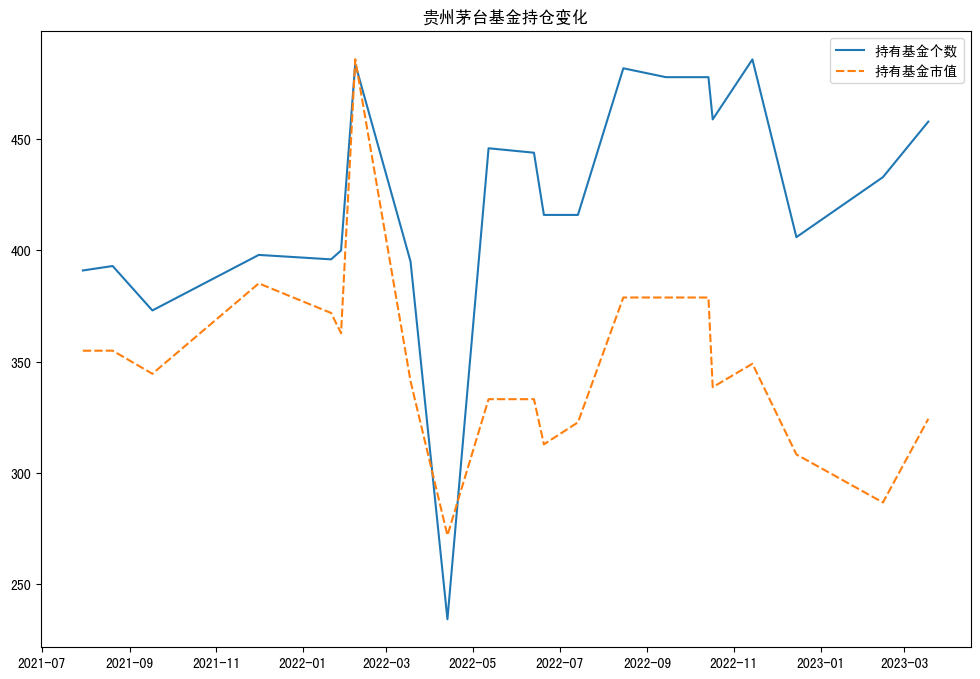

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
from dataModel import JJs, Stocks, db

#import matplotlib    
#print(matplotlib.matplotlib_fname())# 获取mpl目录


matplotlib.use("TkAgg")  # 大小写无所谓 tkaGg ,TkAgg 都行
plt.rcParams["font.family"] = ["sans-serif"]  # 用来正常显示中文标签
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号
%matplotlib inline

name="贵州茅台"

sSelect = Stocks.select()
print("开始查找股票数据...")
dates=[]
datas = sSelect.where((name == Stocks.name))
datas_dict={
    '持有基金个数':[],
    '持有基金市值':[],
}
for stock in datas:
    stock:Stocks
    dates.append(pd.to_datetime(stock.date))
    datas_dict['持有基金个数'].append(stock.n)
    datas_dict['持有基金市值'].append(stock.money)

df = pd.DataFrame(datas_dict)
df.index=dates
print("数据查找完毕，开始绘图...")

fig = sns.lineplot(data=df)
fig.get_figure().set_figwidth(12)  # 设置宽度
fig.get_figure().set_figheight(8)  # 设置高度
plt.title(f"{name}基金持仓变化")
plt.show()


